In [467]:
using Distributions,Gadfly,StatsFuns,InplaceOps
include("/home/seth/code/sparse_normal_categorical/normal_probit_gibbs.jl")

n = 1000;
K = 20;
y = [rand(Poisson(0.1),div(n,2)); rand(Poisson(5),div(n,4));rand(Poisson(10),div(n,4))];
prior = Dict{Symbol,Union{Int64,Float64,Array{Float64}}}(
:K=>K,:a0=>0.5,:b0=>0.1,:SigmaB0=>eye(1),:theta0=>rand(Gamma(0.5,10.0),K));

In [355]:
function llp(y::Int64,lambda::Float64)
    y*log(lambda) - lambda;
end

llp (generic function with 1 method)

In [468]:
@time out = psbpm(y,[],llp,sample_poisson,prior,0,100,40000);
out[:B] = reshape(out[:B],size(out[:B])[2:3]);

368.330819 seconds (4.22 G allocations: 93.336 GB, 4.27% gc time)


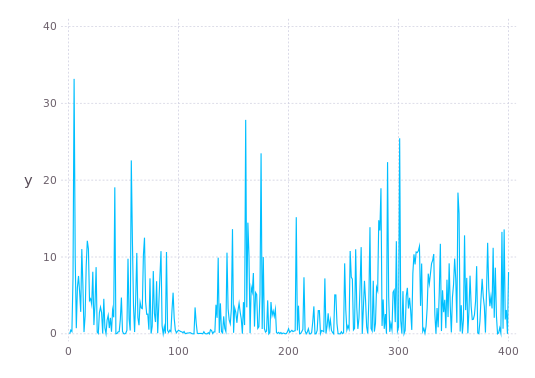

In [474]:
plot(y=out[:theta][6,:],Geom.line)

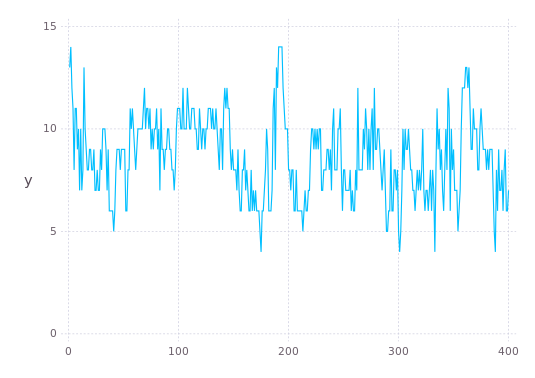

In [476]:
plot(y=mapslices(x -> length(unique(x)),out[:z],1),Geom.line)

In [475]:
foo = mapslices(x -> eta2p(ones((1,1)),x'),out[:B],1)


20x400 Array{Float64,2}:
 0.337629     0.241418     0.213037     …  0.240742     0.15128    
 0.243693     0.309458     0.260939        0.48345      0.48617    
 0.148315     0.116977     0.163684        0.169441     0.236927   
 0.139906     0.147561     0.226347        0.082743     0.0813101  
 0.0620263    0.0608478    0.0533726       0.0210175    0.0406296  
 0.0220615    0.0289009    0.00736551   …  0.000923481  0.000533049
 0.0300384    0.0346912    0.0190506       0.000974881  0.000724229
 0.0033429    0.0216276    0.0353933       0.00026967   0.000755155
 0.00256732   0.00278468   0.00244891      0.000181945  0.000650264
 0.00772813   0.0268766    0.0136163       0.000157462  0.000475938
 0.0013783    0.00548478   0.00307923   …  5.99988e-5   0.000338897
 0.000176099  0.00164861   0.00117069      1.99737e-5   9.14255e-5 
 0.000322692  0.000609814  0.000278429     3.64689e-6   3.11496e-5 
 0.000333416  0.000344722  7.07951e-5      9.24363e-6   4.78938e-5 
 0.000316282  0.0003356